# Examples 

This notebook gives example of all 3 algrorithms implemented, along with some utlity functions

1. Linear Gaussian
2. Linear Gaussian Experimental
3. Gaussian Belief Propogation (GaussianBP)

In [1]:
import sys
sys.path.insert(0, r'B:\Work\Aranti.ai\Codebase\lgnpy')

### Import modules

In [2]:
from lgnpy import LinearGaussian
from lgnpy import GaussianBP
from lgnpy import LinearGaussianExperimental

import pandas as pd
import numpy as np
np.random.seed(42)

### Create Objects for all 3 models

In [3]:
lg1 = LinearGaussian()
lg2 = LinearGaussianExperimental()
lg3 = GaussianBP()

### Set edges

In [4]:
lg1.set_edges_from([('A', 'E'), ('B', 'E'), ('E', 'F'),('E','G'),('D', 'G'),('C', 'H'),('H', 'G')])
lg2.set_edges_from([('A', 'E'), ('B', 'E'), ('E', 'F'),('E','G'),('D', 'G'),('C', 'H'),('H', 'G')])
lg3.set_edges_from([('A', 'E'), ('B', 'E'), ('E', 'F'),('E','G'),('D', 'G'),('C', 'H'),('H', 'G')])

### Create simulated Data for network

In [5]:
n=100
data = pd.DataFrame(columns=['A','B','C','D','E'])

#Root nodes data
data['A'] = np.random.normal(5,2,n)
data['B'] = np.random.normal(10,2,n)
data['C'] = np.random.normal(50,2,n)
data['D'] = np.random.normal(20,2,n)

#Data for nodes with parents
data['E'] = 2*data['A'] + 3*data['B'] + np.random.normal(3,5,n)
data['F'] = 3*data['E'] + np.random.normal(-5,2,n)
data['H'] = 0.4*data['C'] + np.random.normal(0,2,n)
data['G'] = 5 + 3*data['E'] + 0.5*data['H'] + 0.2*data['D'] +  np.random.normal(0,5,n)

### Set Data

In [6]:
lg1.set_data(data)
lg2.set_data(data)
lg3.set_data(data)

### Draw Network

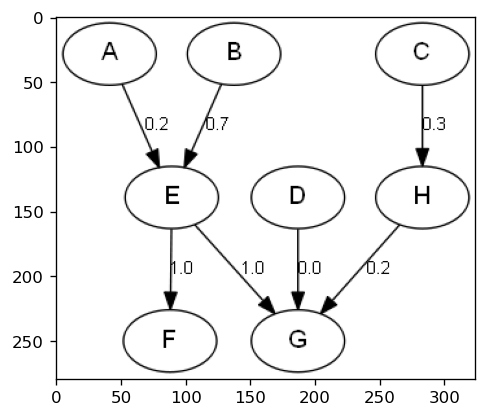

In [7]:
lg1.draw_network("my_network") #Only first drawn, because all are same

### Set Evidences (if any)

In [8]:
lg1.set_evidences({'A':5,'B':10})
lg2.set_evidences({'A':5,'B':10})
lg3.set_evidences({'A':5,'B':10})

### Run inference for each one

Linear Gaussian

In [9]:
lg1.run_inference(debug=True)

Started
Calculated:'E'= 42.63
Parent nodes used: {'A': 5, 'B': 10}
Beta calculated: [-0.62, 1.67, 3.49]
Calculated:'H'= 20.1
Parent nodes used: {'C': 50.13}
Beta calculated: [5.64, 0.29]
Calculated:'G'= 146.954
Parent nodes used: {'E': 42.63, 'D': 20.214, 'H': 20.1}
Beta calculated: [13.93, 3.01, -0.02, 0.26]
Calculated:'F'= 122.651
Parent nodes used: {'E': 42.63}
Beta calculated: [-3.38, 2.96]


,Evidence,Mean,Mean_inferred,Variance,Variance_inferred,u_%change
A,5,4.7923,5,3.299,,4.3339
B,10,10.0446,10,3.638,,-0.4441
C,,50.1298,,4.703,,
D,,20.2137,,3.127,,
E,,42.4384,42.6299,74.904,26.9087,0.4512
F,,122.0846,122.651,657.929,3.269,0.4636
G,,146.3772,146.954,706.643,23.2971,0.3939
H,,20.1001,20.1001,4.888,4.4972,


Experimental Linear Gaussian

In [9]:
lg2.run_inference('D',debug=True) #This experimental runs on particular node only. Ignore Duplicate log messages

Started
Recursing for D with D
Recursing for G with D
Recursing for E with G
Calculated:'E'= 42.449
Parent nodes used: {'A': 5, 'B': 10, 'F': 122.085}
Beta calculated: [0.96, 0.06, 0.06, 0.33]
Recursing for H with G
Calculated:'H'= 20.1
Parent nodes used: {'C': 50.13}
Beta calculated: [5.64, 0.29]
Calculated:'G'= 146.409
Parent nodes used: {'E': 42.449, 'H': 20.1}
Beta calculated: [13.45, 3.01, 0.26]
Calculated:'D'= 20.214
Parent nodes used: {'G': 146.409}
Beta calculated: [19.76, 0.0]


,Evidence,Mean,Mean_inferred,Variance,Variance_inferred,u_%change
A,5,4.7923,5,3.299,,4.3339
B,10,10.0446,10,3.638,,-0.4441
C,,50.1298,,4.703,,
D,,20.2137,20.2138,3.127,3.1197,0.0005
E,,42.4384,42.449,74.904,0.3612,0.025
F,,122.0846,,657.929,,
G,,146.3772,146.409,706.643,23.299,0.0218
H,,20.1001,20.1001,4.888,4.4972,


Gaussian Beilief Propogation

In [12]:
lg3.run_inference(iterations=100) #Dint converge for this graph

Did not converge in given 100. You can use plot_errors() method to see convergence plot.


,Evidence,Mean,Mean_inferred,Variance,Variance_inferred
A,5.0,4.792307,NaN,3.299080,NaN
B,10.0,10.044609,NaN,3.637938,NaN
C,NaN,50.129793,NaN,4.702677,NaN
D,NaN,20.213680,NaN,3.126541,NaN
E,NaN,42.438419,NaN,74.903705,NaN
F,NaN,122.084646,NaN,657.928687,NaN
G,NaN,146.377243,NaN,706.642613,NaN
H,NaN,20.100105,NaN,4.888273,NaN


### More Functions

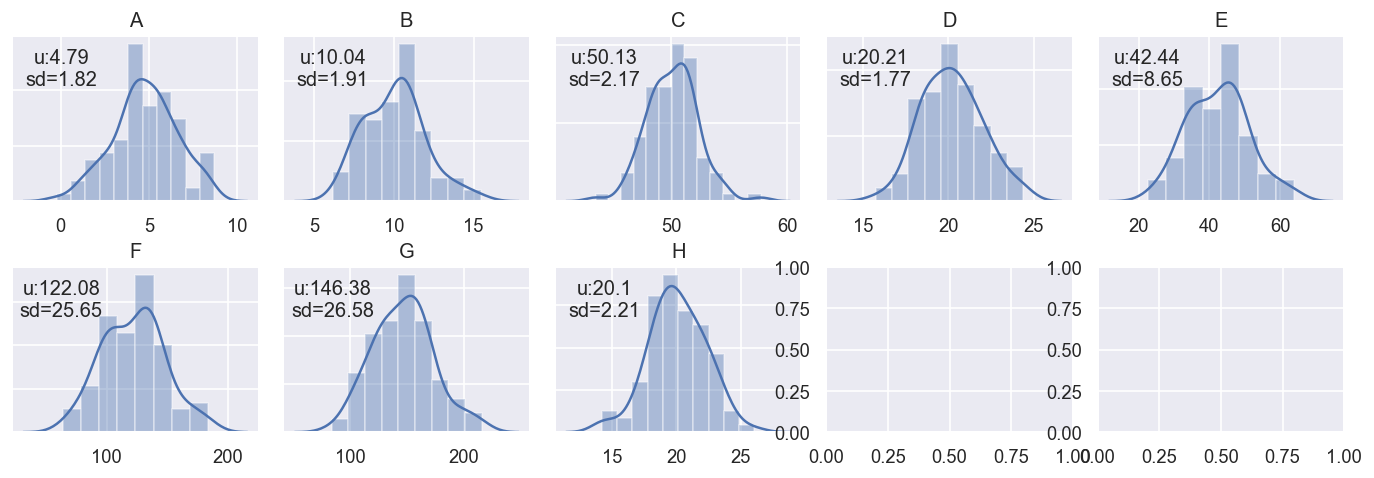

In [13]:
lg1.plot_distributions()

In [14]:
lg1.network_summary()

,Node,Mean,Std,Parents,Children
0,A,4.7923,1.8163,[],[E]
1,B,10.0446,1.9073,[],[E]
2,C,50.1298,2.1686,[],[H]
3,D,20.2137,1.7682,[],[G]
4,E,42.4384,8.6547,"[A, B]","[F, G]"
5,F,122.0846,25.6501,[E],[]
6,G,146.3772,26.5828,"[E, D, H]",[]
7,H,20.1001,2.2109,[C],[G]


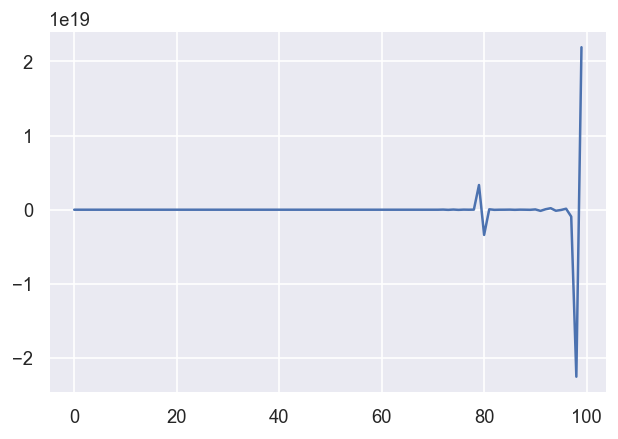

In [15]:
lg3.plot_errors() #Only aviabble for GaussianBP

In [16]:
lg1.inf_summary #Get summary of inference

,Evidence,Mean,Mean_inferred,Variance,Variance_inferred,u_%change
A,5,4.7923,5,3.299,,4.3339
B,10,10.0446,10,3.638,,-0.4441
C,,50.1298,,4.703,,
D,,20.2137,,3.127,,
E,,42.4384,42.6299,74.904,26.9087,0.4512
F,,122.0846,122.651,657.929,3.269,0.4636
G,,146.3772,146.954,706.643,23.2971,0.3939
H,,20.1001,20.1001,4.888,4.4972,


### Model Parameters

In [17]:
lg1.get_covariance()

,A,B,C,D,E,F,G,H
A,3.299080,-0.472617,0.751689,-0.546709,3.864676,11.082491,10.623449,0.451469
B,-0.472617,3.637938,-0.151516,-0.059400,11.903884,35.254452,36.730528,0.281298
C,0.751689,-0.151516,4.702677,-0.000993,-0.174694,-1.133052,-0.049114,1.356046
D,-0.546709,-0.059400,-0.000993,3.126541,0.743318,2.467016,2.199467,0.152563
E,3.864676,11.903884,-0.174694,0.743318,74.903705,221.441725,226.188907,2.555842
F,11.082491,35.254452,-1.133052,2.467016,221.441725,657.928687,669.370855,7.095005
G,10.623449,36.730528,-0.049114,2.199467,226.188907,669.370855,706.642613,8.946494
H,0.451469,0.281298,1.356046,0.152563,2.555842,7.095005,8.946494,4.888273


In [18]:
lg1.get_precision_matrix()

array([[ 0.46644377,  0.28927171, -0.06389771,  0.10290332, -0.164653  ,
         0.01893218,  0.01251737, -0.00951069],
       [ 0.28927171,  0.76674973, -0.02730804,  0.09676011, -0.11950257,
         0.00655705, -0.01258949,  0.00972243],
       [-0.06389771, -0.02730804,  0.24486236, -0.01406874, -0.07447988,
         0.03351708, -0.00469419, -0.06112939],
       [ 0.10290332,  0.09676011, -0.01406874,  0.34815015,  0.0390211 ,
        -0.02499424,  0.003688  , -0.01290951],
       [-0.164653  , -0.11950257, -0.07447988,  0.0390211 ,  3.07136748,
        -0.92159112, -0.10104126, -0.0417887 ],
       [ 0.01893218,  0.00655705,  0.03351708, -0.02499424, -0.92159112,
         0.32166872, -0.01055541,  0.0236494 ],
       [ 0.01251737, -0.01258949, -0.00469419,  0.003688  , -0.10104126,
        -0.01055541,  0.0443661 , -0.01229305],
       [-0.00951069,  0.00972243, -0.06112939, -0.01290951, -0.0417887 ,
         0.0236494 , -0.01229305,  0.23227325]])

In [19]:
lg1.get_mean()

A      4.792307
B     10.044609
C     50.129793
D     20.213680
E     42.438419
F    122.084646
G    146.377243
H     20.100105
dtype: float64

In [20]:
lg1.get_model_parameters()

{'A': None,
 'B': None,
 'C': None,
 'D': None,
 'E': {'node_values': {'A': 5, 'B': 10}, 'node_betas': [-0.62, 1.67, 3.49]},
 'F': {'node_values': {'E': 42.63}, 'node_betas': [-3.38, 2.96]},
 'G': {'node_values': {'E': 42.63, 'D': 20.214, 'H': 20.1},
  'node_betas': [13.93, 3.01, -0.02, 0.26]},
 'H': {'node_values': {'C': 50.13}, 'node_betas': [5.64, 0.29]}}

### Network Utility Functions

In [21]:
lg1.get_nodes()

['A', 'E', 'B', 'F', 'G', 'D', 'C', 'H']

In [22]:
lg1.get_edges()

[('A', 'E'),
 ('E', 'F'),
 ('E', 'G'),
 ('B', 'E'),
 ('D', 'G'),
 ('C', 'H'),
 ('H', 'G')]

In [23]:
lg1.get_parents('E')

['A', 'B']

In [24]:
lg1.get_children('E')

['F', 'G']

In [25]:
lg1.get_siblings('E')

['E', 'D', 'H']

In [26]:
lg1.get_neighbors('E')

['A', 'B', 'F', 'G']

In [27]:
lg1.has_children('E')

True

In [28]:
lg1.has_parents('D')

False

In [29]:
lg1.set_edge('A','B')

### Functions related to Evidence

In [30]:
lg1.get_evidences()

{'A': 5,
 'B': 10,
 'C': None,
 'D': None,
 'E': None,
 'F': None,
 'G': None,
 'H': None}

In [31]:
lg1.clear_evidences() #Clears evidence from network
lg1.get_evidences() #Check if evidences are cleared

{'A': None,
 'B': None,
 'C': None,
 'D': None,
 'E': None,
 'F': None,
 'G': None,
 'H': None}